# Customer Segmentation using Machine Learning
-------------------------------------------------
#### Author: Ramandeep Kaur
#### Description:
 This project performs customer segmentation using K-Means clustering, Hierarchical Clustering, DBSCAN Clustering.
 The goal is to group customers based on their purchasing behavior
 so that businesses can make data-driven marketing decisions.

####  1. Import Required Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#### 2. Load the Dataset

In [22]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [23]:
# printing the first 5 rows of the dataset
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 3. Data Understanding

In [4]:
# finding number of rows and columns in this dataset
customer_data.shape

(200, 5)

In [5]:
# getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
# Statistical Summary about the dataset
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 4. Feature Selection

We select features relevant for customer segmentation.
- Annual Income
- Spending Score 

In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#### 5. Feature Scaling

K-Means is distance-based, so scaling is necessary

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

#### 6. Elbow Method to Find Optimal K(No. of Clusters)

In [27]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)

    wcss.append(kmeans.inertia_)

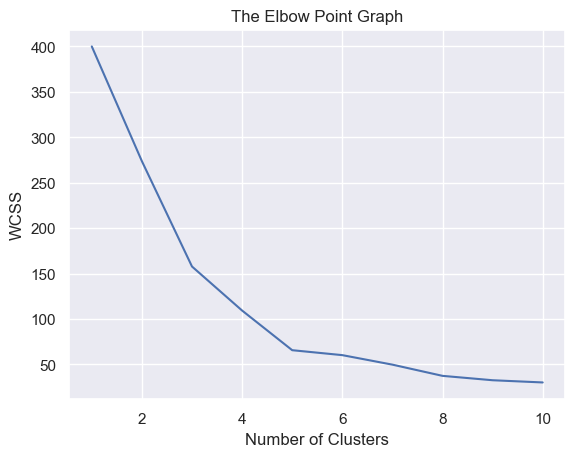

In [28]:
# plot an elbow graph 
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Elbow Method for Optimal Clusters**

The Elbow Method is used to determine the optimal number of clusters.  
The **Within-Cluster Sum of Squares (WCSS)** is calculated for different values of K.
The point where the WCSS curve starts to flatten indicates the optimal number of
clusters. Based on the elbow plot, **K = 5** is selected.


#### 7. K-Means Clustering Model

In [30]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
clusters = kmeans.fit_predict(X_scaled)

print(clusters)
customer_data['Cluster'] = clusters

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters - 0, 1, 2, 3, 4

**Cluster Evaluation (Silhouette Score)**

In [32]:
score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.555


**Visualizing all the Clusters**

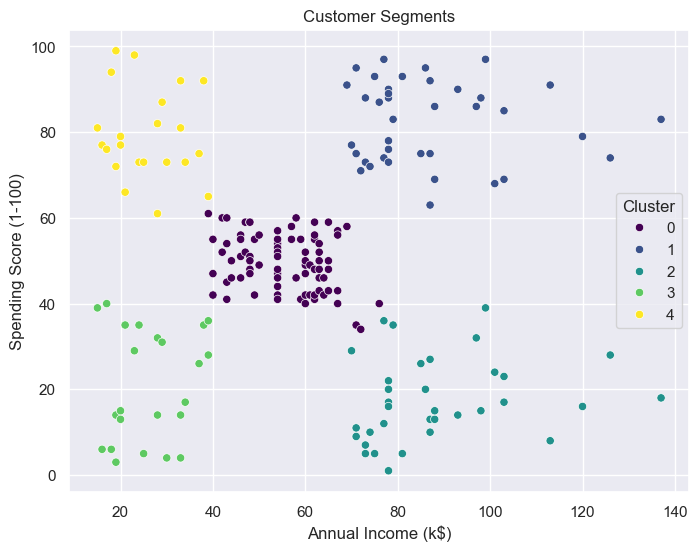

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_data['Annual Income (k$)'],
    y=customer_data['Spending Score (1-100)'],
    hue=customer_data['Cluster'],
    palette='viridis'
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Cluster Interpretation**

In [40]:
cluster_summary = (
    customer_data
    .groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']]
    .mean()
)

print("\nCluster Summary (Income & Spending Only):\n")
print(cluster_summary)


Cluster Summary (Income & Spending Only):

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 88.200000               17.114286
3                 26.304348               20.913043
4                 25.727273               79.363636


#### 8. Hierarchical Clustering

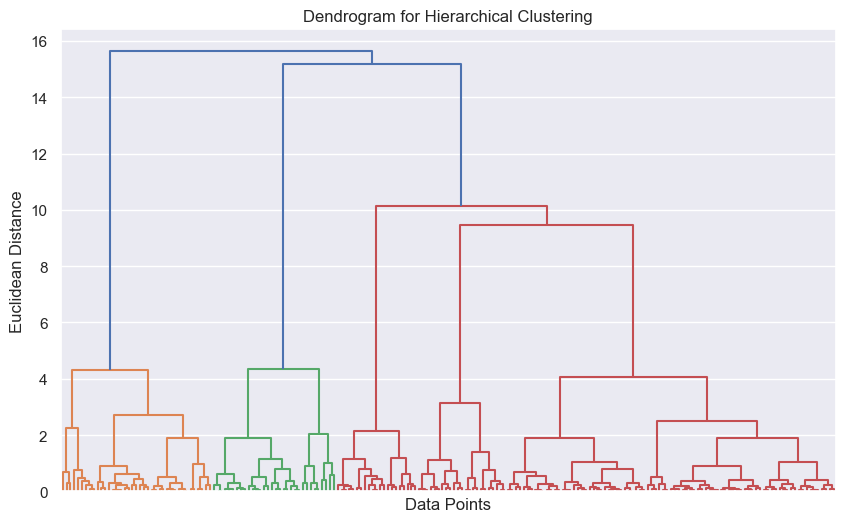

In [44]:
# Create linkage matrix using Ward's method
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, no_labels= True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [45]:
# Applying Agglomerative Clustering (choosing 5 clusters from dendrogram)
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
h_labels = hierarchical.fit_predict(X_scaled)

customer_data['Hierarchical_Cluster'] = h_labels

**Cluster Evaluation (Silhouette Score)**

In [47]:
h_score = silhouette_score(X_scaled, h_labels)
print(f'Hierarchical Clustering Silhouette Score: {h_score:.3f}')

Hierarchical Clustering Silhouette Score: 0.554


**Visualizing all the Clusters**

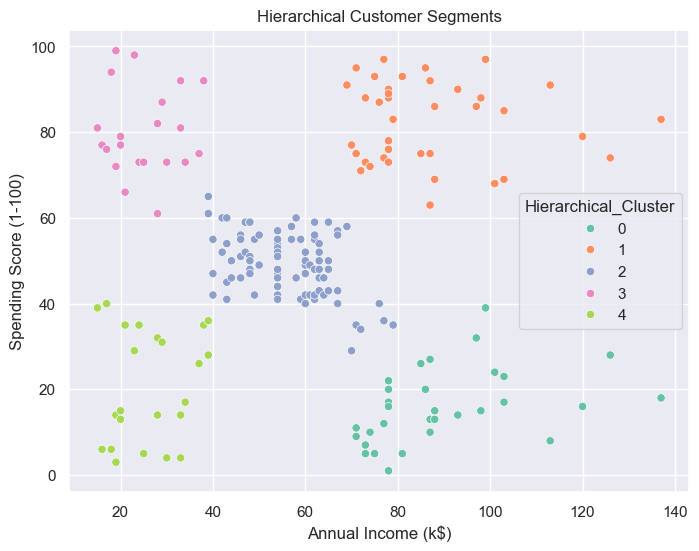

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_data['Annual Income (k$)'],
    y=customer_data['Spending Score (1-100)'],
    hue=customer_data['Hierarchical_Cluster'],
    palette='Set2'
)
plt.title('Hierarchical Customer Segments')
plt.show()

#### 9. Final Insights from the Clusters**

From the **Annual Income vs Spending Score** graph, the mall customers are segmented into **5 clear groups**:

---

**Cluster 0 – Medium Income, Medium Spending (Core Customers)**
- Regular visitors  
- Stable and predictable spending  

**Mall Strategy**
- Seasonal discounts  
- Loyalty programs  
- Family & combo offers  

---

**Cluster 1 – High Income, High Spending (Premium Customers)**
- Highest value customers  
- Strong buying power  

**Mall Strategy**
- Luxury brands  
- VIP memberships  
- Exclusive events and early access  

---

**Cluster 2 – High Income, Low Spending (Potential Customers)**
- Can spend but choose not to  
- High conversion opportunity  

**Mall Strategy**
- Personalized offers  
- Premium discounts  
- Trial experiences  

---

**Cluster 3 – Low Income, Low Spending (Budget Customers)**
- Highly price-sensitive customers  

**Mall Strategy**
- Discount stores  
- Budget brands  
- Clearance sales  

---

**Cluster 4 – Low Income, High Spending (Impulse / Youth Shoppers)**
- Spend more despite lower income  
- Trend-driven buying behavior  

**Mall Strategy**
- Fashion brands  
- Flash sales  
- Entertainment and food court offers  


#### 9. Model Comparison

In this project, K-Means Clustering and Hierarchical Clustering were applied to segment customers based on annual income and spending score. The performance of both models was evaluated using the Silhouette Score.

- **K-Means Clustering**

Achieved a Silhouette Score of approximately 0.555

Performs well when clusters are spherical and evenly distributed

Computationally efficient and easy to interpret

Well-suited for large datasets and practical business use cases

- **Hierarchical Clustering**

Achieved a Silhouette Score of approximately 0.554

Dendrogram visualization helps understand how clusters are formed and merged

Useful for analyzing relationships between customer groups

- **Overall Comparison**

Both models produced comparable Silhouette Scores, indicating good cluster quality

K-Means performed slightly better and was more efficient for this dataset

Hierarchical clustering added interpretability through dendrogram analysis

Therefore, K-Means was selected as the primary clustering model, while hierarchical clustering was used for validation and analysis

#### 10. Conclusion
In this project, **unsupervised learning techniques** were applied to perform customer segmentation based on **annual income** and **spending behavior.**

**K-Means clustering** successfully divided customers into **five meaningful segments**, demonstrating strong performance with a **Silhouette Score of approximately 0.555**. The resulting clusters were well-separated and easy to interpret, making K-Means an effective choice for this dataset.

**Hierarchical clustering** was also implemented to validate the results. It produced a comparable Silhouette Score and provided additional insights through **dendrogram visualization**, helping to understand how customer groups are formed and related.

Overall, the segmentation results can help businesses:

- Identify **high-value and budget-conscious customers**

- Design **targeted marketing campaigns**

- Improve **customer retention and personalization strategies**

This project highlights how clustering techniques can transform raw customer data into **actionable business insights.**